<a href="https://colab.research.google.com/github/roheth286/CSI_Forkthis_Clustering_Repository/blob/master/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clustering of Sensorless Drive Diagnosis**

---

This dataset contains features extracted from motor current signals. The motor operates under 11 distinct conditions, reflecting combinations of intact and defective components, measured across 12 different operating setups, including variations in speed, load moments, and load forces. The current signals were recorded using a probe and oscilloscope on two phases. However, the dataset does not explicitly indicate which conditions are defective or intact. To explore the inherent structure and groupings within the data, we apply clustering algorithms. By leveraging unsupervised techniques, we aim to identify natural clusters corresponding to different motor conditions, potentially separating defective from intact components, and gain insights into how the various operating conditions influence the observed signal features.

The Dataset contains of 58509 examples each having 48 features (the last column is the labels columns which tell which class they fall into)

#**1. Loading the Dataset and Preprocessing**

---

**1.1 Loading the dataset**

*  Here we are importing a .txt file from our local like explorer and converting it to a numpy ndarray.

In [1]:
import numpy as np
import io
from google.colab import files


##### Upload the .txt file ################


uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = np.loadtxt(io.BytesIO(uploaded[filename]))
file_object=io.BytesIO(uploaded[filename])
data=np.loadtxt(file_object)
print("Dataset Loaded Successfully\n")
print(data)
print(data.shape)

Saving Sensorless_drive_diagnosis.txt to Sensorless_drive_diagnosis.txt
Dataset Loaded Successfully

[[-3.0146e-07  8.2603e-06 -1.1517e-05 ... -1.4996e+00 -1.4996e+00
   1.0000e+00]
 [ 2.9132e-06 -5.2477e-06  3.3421e-06 ... -1.5005e+00 -1.5005e+00
   1.0000e+00]
 [-2.9517e-06 -3.1840e-06 -1.5920e-05 ... -1.4985e+00 -1.4985e+00
   1.0000e+00]
 ...
 [-5.8577e-06  1.8594e-05 -1.0171e-04 ... -1.4912e+00 -1.4910e+00
   1.1000e+01]
 [-4.4411e-06  3.3969e-05 -4.4166e-04 ... -1.4932e+00 -1.4931e+00
   1.1000e+01]
 [-8.8533e-06  5.2259e-05  7.2466e-05 ... -1.4946e+00 -1.4943e+00
   1.1000e+01]]
(58509, 49)


**1.2 Seperating the Labels form the Dataset and Normalizing**

*  Converting out Numpy array into a Pandas Dataframe
*  Removing the labels column
*  Normalizaing our data before clustering

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


##### Converting NumpyArray to Pandas Dataframe ##############
print("Number of rows and coulmns in the Dataset")
print("Columns:",data.shape[1])
print("Rows:",data.shape[0],"\n")
df=pd.DataFrame(data)

###### Seperating Labels Columns ########

labels=df.iloc[:,-1]
df=df.iloc[:,:-1]
print(df.shape,labels.shape)


########## Number of Unique Values #########
number_of_unique_labels=labels.nunique()
print("\nNumber of Unique Labels:",number_of_unique_labels)
unique_lables=labels.unique()
print("Unique Labels:",unique_lables)
labels_count=labels.value_counts()
print("Labels Count:\n",labels_count)

###### Z-Score Normailzation ############

df_original=df.copy()
scaler=StandardScaler()
df=scaler.fit_transform(df)
df=pd.DataFrame(df)
df.head()

Number of rows and coulmns in the Dataset
Columns: 49
Rows: 58509 

(58509, 48) (58509,)

Number of Unique Labels: 11
Unique Labels: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
Labels Count:
 48
1.0     5319
2.0     5319
3.0     5319
4.0     5319
5.0     5319
6.0     5319
7.0     5319
8.0     5319
9.0     5319
10.0    5319
11.0    5319
Name: count, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.042273,0.122776,-0.054947,-0.015927,-0.049283,-0.092664,0.817264,0.817132,0.817376,-0.316864,...,-0.346510,-0.009406,-0.347679,-0.023450,1.308985,1.311947,1.295447,-0.578124,-0.571083,-0.602998
1,0.087101,-0.120376,0.008203,-0.075777,0.025220,-0.015416,0.792201,0.792451,0.792286,-0.325242,...,-0.696215,-0.007810,0.026616,-0.320561,1.144930,1.148347,1.130230,-0.862670,-0.855606,-0.886485
2,0.005315,-0.083228,-0.073660,0.001668,-0.051697,0.078074,0.849046,0.849217,0.849594,-0.269799,...,-0.377842,-0.009384,-0.362632,-0.452653,0.707449,0.712081,0.717189,-0.230345,-0.223334,-0.256514
3,0.028033,0.132852,-0.073485,-0.055887,-0.036735,0.019494,0.753975,0.753811,0.754200,-0.274642,...,2.173221,-0.008999,-0.059460,-0.306610,1.254300,1.257414,1.240375,0.085818,0.092802,0.026973
4,0.045523,-0.015715,-0.116099,-0.082711,-0.037897,0.060818,0.773417,0.773501,0.774161,-0.293249,...,-0.485493,-0.009287,-0.223125,0.190275,1.391013,1.393747,1.378055,0.591678,0.598620,0.562448


#**2. Clustering Techniques**

**2.1 WCCS VS. K-Values**

The WCSS (Within-Cluster Sum of Squares) vs. K-values graph helps determine the optimal number of clusters for KMeans. WCSS measures the total variance within each cluster, so lower values indicate tighter clusters. By plotting WCSS for different numbers of clusters (K), we look for an “elbow” point where adding more clusters yields diminishing returns in reducing variance. This point suggests a suitable number of clusters that balances compactness and simplicity, guiding our choice of K before performing the final clustering.

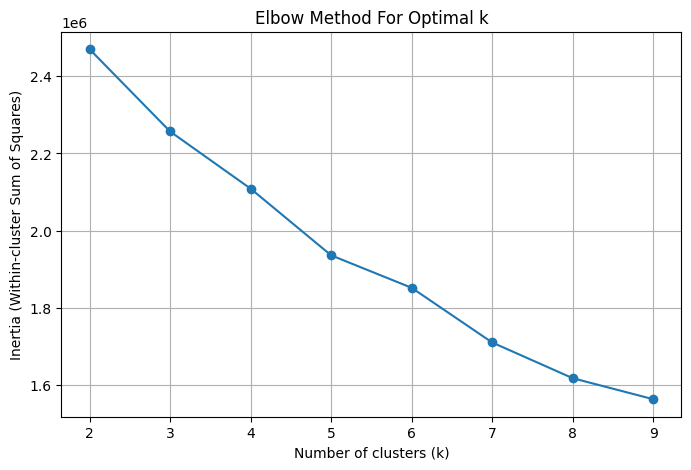

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

############ Finding Loss for different number of clusters ####################
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

############### Plot the elbow curve #################################
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), inertia, marker='o')
plt.xticks(range(2, 10))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


**2.2 Silhouette Score vs Number of Clusters**

The Silhouette Score measures how well each data point fits within its assigned cluster compared to other clusters. It combines cohesion (how close points are within the same cluster) and separation (how far they are from points in other clusters). Scores range from -1 to 1, with higher values indicating better-defined, more distinct clusters. By calculating the silhouette score for various numbers of clusters, we can assess which K produces the most coherent clustering. The resulting Silhouette Score vs. Number of Clusters graph visualizes this relationship, helping identify the number of clusters that maximizes cluster quality and separation.

k:  2  Silhouette Score:  0.15748556797206406
k:  3  Silhouette Score:  0.17411737250852474
k:  5  Silhouette Score:  0.14133871356616146
k:  8  Silhouette Score:  0.15356858698373463
k:  10  Silhouette Score:  0.16035247628249255


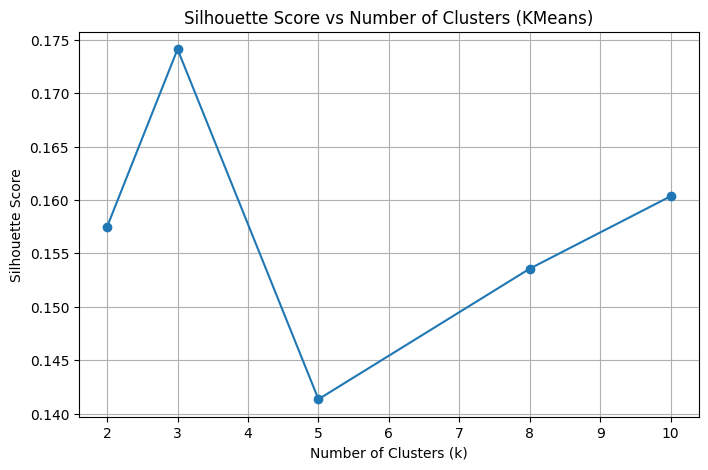

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

cluster_numbers = [2,3,5,8,10]
sil_scores = []

for k in cluster_numbers:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df)
    score = silhouette_score(df, cluster_labels)
    sil_scores.append(score)
    print("k: ", k," Silhouette Score: ",score)

plt.figure(figsize=(8,5))
plt.plot(cluster_numbers, sil_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters (KMeans)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


The Within-Cluster Sum of Squares (WCSS) measures the total variance within each cluster, essentially quantifying how tightly the data points are grouped. Lower WCSS values indicate more compact clusters. By plotting WCSS against different numbers of clusters, we look for the “elbow point”—the K value after which adding more clusters does not significantly reduce WCSS. This point suggests a balance between minimizing intra-cluster variance and avoiding an excessive number of clusters. The WCSS vs. Number of Clusters graph thus provides a visual way to estimate the optimal cluster count, complementing the silhouette analysis, and helps in making a data-driven decision on the appropriate number of clusters for meaningful separation.

The Silhouette Score measures how well each data point fits within its assigned cluster compared to other clusters. It combines cohesion (how close points are within the same cluster) and separation (how far they are from points in other clusters). Scores range from -1 to 1, with higher values indicating better-defined, more distinct clusters. By calculating the silhouette score for various numbers of clusters, we can assess which K produces the most coherent clustering. The resulting Silhouette Score vs. Number of Clusters graph visualizes this relationship, helping identify the number of clusters that maximizes cluster quality and separation.



**2.3 Principal Component Anaylsis**

Clustering directly on the raw dataset with all its features tends to produce poor silhouette scores because the high-dimensional space dilutes the natural groupings, making it difficult for clustering algorithms to distinguish distinct clusters. To address this, we apply Principal Component Analysis (PCA), a dimensionality reduction technique that transforms the original features into a smaller set of uncorrelated components while retaining the maximum variance. By projecting the data onto the first few principal components, we reduce noise and redundancy, allowing clusters to become more separable. Although the silhouette scores improve with PCA, they still highlight the inherent challenge of separating classes purely based on the extracted features, emphasizing the need for careful selection of components and cluster counts to uncover meaningful structures.

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result_2 = pca.fit_transform(df)
df_pca_2 = pd.DataFrame(pca_result_2, columns=['PC1', 'PC2', ])

pca = PCA(n_components=3)
pca_result_3 = pca.fit_transform(df)
df_pca_3 = pd.DataFrame(pca_result_3, columns=['PC1', 'PC2', 'PC3'])

pca = PCA(n_components=5)
pca_result_5 = pca.fit_transform(df)
df_pca_5 = pd.DataFrame(pca_result_5, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

pca = PCA(n_components=8)
pca_result_8 = pca.fit_transform(df)
df_pca_8 = pd.DataFrame(pca_result_8, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])


pca = PCA(n_components=10)
pca_result_10 = pca.fit_transform(df)
df_pca_10 = pd.DataFrame(pca_result_10, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

**2.4 Choosing the Correct Combination of reduced dimensions and number of clusters**

In this step, we aim to identify the optimal number of dimensions that allow clear and well-separated clusters. We achieve this by applying PCA with different numbers of components (2, 3, 5, 8, and 10) to reduce the dataset’s dimensionality. For each reduced dataset, we perform KMeans clustering with a fixed number of clusters and calculate the silhouette score, which measures how well-separated the clusters are. By comparing silhouette scores across different PCA dimensions, we can determine which number of components best captures the underlying structure of the data, helping us choose a dimensionality that produces the most coherent clustering.

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pca_dict = {
    2: df_pca_2,
    3: df_pca_3,
    5: df_pca_5,
    8: df_pca_8,
    10: df_pca_10
}

cluster_numbers = [2,3,5,8,10]

best_sil = -1
best_pca = 0
best_k = 0

for n_components, X_pca_df in pca_dict.items():
    X_pca = X_pca_df.values

    for k in cluster_numbers:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        labels = kmeans.fit_predict(X_pca)
        sil_score = silhouette_score(X_pca, labels)

        print("PCA components:", n_components, "k: ",k,"silhouette :",sil_score)

        if sil_score > best_sil:
            best_sil = sil_score
            best_pca = n_components
            best_k = k

print("\nBest combination:")
print("PCA components:", best_pca, "Number of clusters:", best_k, "Silhouette Score:", best_sil)


PCA components=2, k=2, silhouette=0.3457
PCA components=2, k=3, silhouette=0.4085
PCA components=2, k=5, silhouette=0.3858
PCA components=2, k=8, silhouette=0.3782
PCA components=2, k=10, silhouette=0.3925
PCA components=3, k=2, silhouette=0.3063
PCA components=3, k=3, silhouette=0.3503
PCA components=3, k=5, silhouette=0.3470
PCA components=3, k=8, silhouette=0.3637
PCA components=3, k=10, silhouette=0.3629
PCA components=5, k=2, silhouette=0.2492
PCA components=5, k=3, silhouette=0.2816
PCA components=5, k=5, silhouette=0.2782
PCA components=5, k=8, silhouette=0.2683
PCA components=5, k=10, silhouette=0.2757
PCA components=8, k=2, silhouette=0.2174
PCA components=8, k=3, silhouette=0.2440
PCA components=8, k=5, silhouette=0.2290
PCA components=8, k=8, silhouette=0.2530
PCA components=8, k=10, silhouette=0.2601
PCA components=10, k=2, silhouette=0.2006
PCA components=10, k=3, silhouette=0.2238
PCA components=10, k=5, silhouette=0.2021
PCA components=10, k=8, silhouette=0.2173
PCA comp

**2.5 K-means Clustering with optimized combination**

K-means clustering is a straightforward and widely used technique to group data points into distinct clusters based on their similarity. It works by first choosing a set number of clusters, then assigning each data point to the nearest cluster center (centroid). After all points are assigned, the centroids are recalculated as the average of points in that cluster, and this process repeats iteratively until the assignments stabilize. The goal is to minimize the variance within each cluster, so points within a cluster are as similar as possible while being distinct from points in other clusters. It’s simple, fast, and effective for finding patterns in datasets where the number of clusters is roughly known in advance.

In [9]:
from sklearn.cluster import KMeans
X_best = pca_dict[best_pca]
k = best_k

kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_best)
print("KMeans clustering done.")

KMeans clustering done.


**2.7 Gaussian Mixture Modelling with optimized combination**

Gaussian Mixture Model (GMM) clustering is a probabilistic approach to grouping data points. Unlike K-means, which assigns each point strictly to one cluster, GMM assumes that data is generated from a mixture of several Gaussian distributions and assigns each point a probability of belonging to each cluster. The model iteratively estimates the parameters (mean, variance, and weight) of these Gaussians to maximize the likelihood of the observed data. This allows GMM to capture clusters that are not strictly spherical or equally sized, making it more flexible for datasets with overlapping or elliptical clusters. In simple terms, GMM tries to “fit” multiple bell-shaped distributions to the data, letting us understand cluster structure in a probabilistic way.

In [10]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=k, n_init=10, random_state=42)
gmm_labels = gmm.fit_predict(X_best)
print("GMM clustering done.")

GMM clustering done.


#**3. Visuializatiion**

**3.1 PCA scatter**

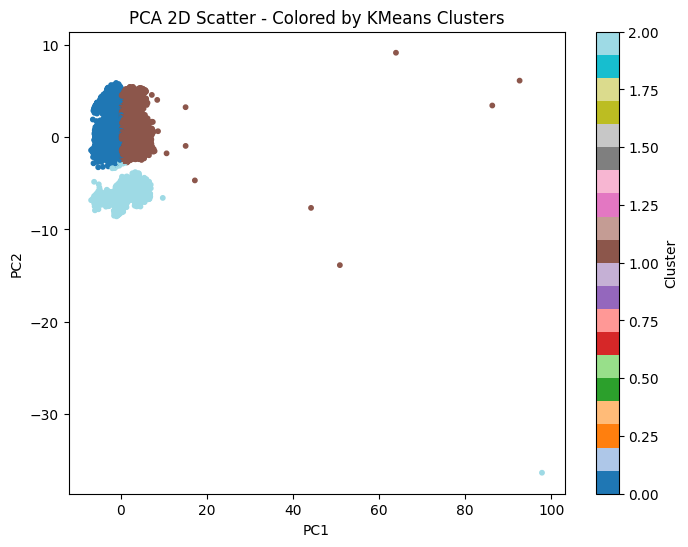

In [11]:
import matplotlib.pyplot as plt
import numpy as np

df_plot = X_best
labels_int = labels.astype(int)
############################# Plot coloured by Clusters ###################################################
plt.figure(figsize=(8,6))
plt.scatter(df_plot.iloc[:,0], df_plot.iloc[:,1], c=kmeans_labels, cmap='tab20', s=10)
plt.title("PCA 2D Scatter - Colored by KMeans Clusters")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()


**3.2 UMAP 2D scatter:**

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


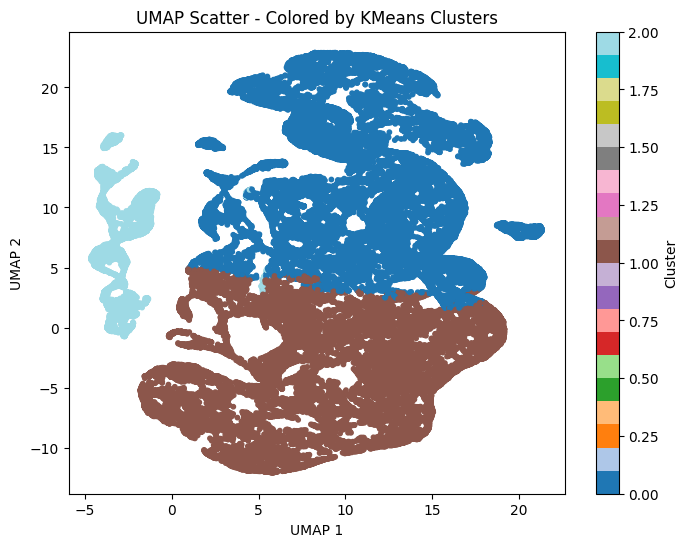

In [12]:
import umap

umap_model = umap.UMAP(n_components=best_pca, random_state=42)
umap_result = umap_model.fit_transform(X_best)

################################ UMAP colored by KMeans clusters #############################################33
plt.figure(figsize=(8,6))
plt.scatter(umap_result[:,0], umap_result[:,1], c=kmeans_labels, cmap='tab20', s=10)
plt.title("UMAP Scatter - Colored by KMeans Clusters")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Cluster')
plt.show()




**3.3 T-SNE Plot**

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


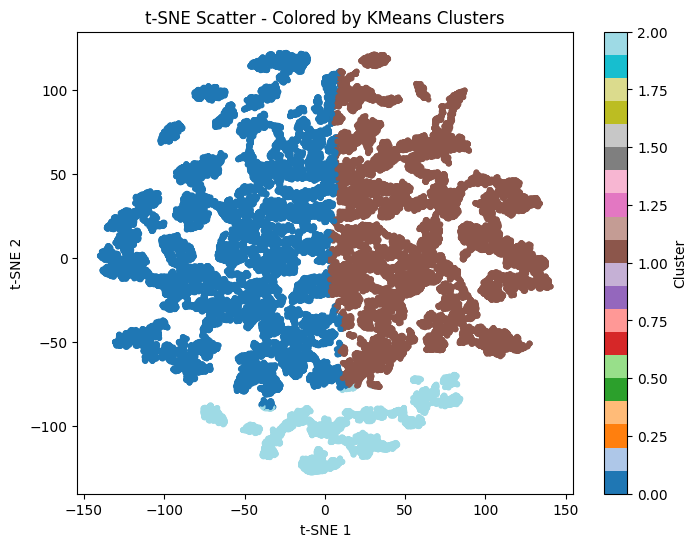

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=best_pca, random_state=42, perplexity=50, n_iter=1000)
tsne_result = tsne.fit_transform(X_best)

######################################## t-SNE colored by KMeans clusters ##########################################3
plt.figure(figsize=(8,6))
plt.scatter(tsne_result[:,0], tsne_result[:,1], c=kmeans_labels, cmap='tab20', s=10)
plt.title("t-SNE Scatter - Colored by KMeans Clusters")
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Cluster')
plt.show()




**3.3 Tacked bar chart per cluster**

In [16]:
index_list = []
for i in range(k):
    index_list.append('Cluster ' + str(i))

column_list = []
for lbl in unique_lables:
    column_list.append('Label ' + str(lbl))

contingency_df = pd.DataFrame(0, index=index_list, columns=column_list)

for cluster_idx in range(k):
    for label_idx in range(len(unique_lables)):
        label_value = unique_lables[label_idx]
        mask = (kmeans_labels == cluster_idx) & (labels == label_value)
        count = np.sum(mask)
        contingency_df.iloc[cluster_idx, label_idx] = count


print("Cluster composition table:")
print(contingency_df)


Cluster composition table:
           Label 1.0  Label 2.0  Label 3.0  Label 4.0  Label 5.0  Label 6.0  \
Cluster 0          0       3855       2199       4023          0      10486   
Cluster 1       7187       4396       4341       3801          3          0   
Cluster 2         11          0         71         39          0          2   

           Label 7.0  Label 8.0  Label 9.0  Label 10.0  Label 11.0  
Cluster 0          0          0          1           0           0  
Cluster 1          0          2          1           0           0  
Cluster 2       2801          1       2508           0           0  


#**4. Evaluation**

**4.1 Silhouette Score, Calinski-Harabasz Index, Davies-Bouldin Index**

In [17]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

######################## Kmeans ###############################################
sil_score = silhouette_score(X_best, kmeans_labels)
ch_score = calinski_harabasz_score(X_best, kmeans_labels)
db_score = davies_bouldin_score(X_best, kmeans_labels)


print("Silhouette Score:", sil_score)
print("Calinski-Harabasz Index:", ch_score)
print("Davies-Bouldin Index:", db_score)


################################# GMM #####################################
sil_score = silhouette_score(X_best, gmm_labels)
ch_score = calinski_harabasz_score(X_best, gmm_labels)
db_score = davies_bouldin_score(X_best, gmm_labels)

print("Silhouette Score:", sil_score)
print("Calinski-Harabasz Index:", ch_score)
print("Davies-Bouldin Index:", db_score)

Silhouette Score: 0.4084622531750843
Calinski-Harabasz Index: 39914.90158177482
Davies-Bouldin Index: 0.8411770550111864
Silhouette Score: 0.4026451234367342
Calinski-Harabasz Index: 38043.53836505132
Davies-Bouldin Index: 0.8422290518039167


**4.2 Adjusted Rand Index (ARI), Normalized Mutual Information (NMI),Accuracyvia Hungarian matching**

In [18]:
import numpy as np
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from scipy.optimize import linear_sum_assignment

##################################3 Hungarian matching accuracy ####################################################3
def hungarian_accuracy(y_true, y_pred):
    D = max(y_pred.max(), y_true.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
    ind_row, ind_col = linear_sum_assignment(w.max() - w)
    return sum(w[i, j] for i, j in zip(ind_row, ind_col))



###################################### KMeans ################################
ari = adjusted_rand_score(labels, kmeans_labels)
nmi = normalized_mutual_info_score(labels, kmeans_labels)
acc = hungarian_accuracy(labels, kmeans_labels)

print("KMeans → ARI:", ari, "NMI:", nmi, "Accuracy (Hungarian):", acc)


############################## GMM ################################
ari = adjusted_rand_score(labels, gmm_labels)
nmi = normalized_mutual_info_score(labels, gmm_labels)
acc = hungarian_accuracy(labels, gmm_labels)

print("GMM → ARI:", ari, "NMI:", nmi, "Accuracy (Hungarian):", acc)


KMeans → ARI: 0.1785501237146108 NMI: 0.3570133274459886 Accuracy (Hungarian): 20474
GMM → ARI: 0.17475126224055398 NMI: 0.36144986439453614 Accuracy (Hungarian): 20473


**4.3 Feature importance via PCA loadings**

In [20]:
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=best_pca)
X_pca = pca.fit_transform(df.values)

loadings = pca.components_.T
################################# Feature Importance ##################################
pc_columns = []
for i in range(best_pca):
    pc_name = 'PC' + str(i+1)
    pc_columns.append(pc_name)

feature_names = df.columns
loadings_df = pd.DataFrame(loadings, index=feature_names, columns=pc_columns)

top_features_per_pc = {}
for pc in loadings_df.columns:
    pc_loadings = loadings_df[pc]
    pc_loadings_abs = pc_loadings.abs()
    pc_loadings_sorted = pc_loadings_abs.sort_values(ascending=False)
    top_5_features = pc_loadings_sorted.head(5)
    top_features_per_pc[pc] = top_5_features.index.tolist()


print("Top contributing features per principal component:")
for pc in top_features_per_pc:
    print(pc, ": ", top_features_per_pc[pc])


Top contributing features per principal component:
PC1 :  [21, 22, 23, 18, 19]
PC2 :  [9, 11, 10, 6, 7]
